In [13]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
#Set working directory and load data
os.chdir('C:\\Users\\mbafandkar')
iris = pd.read_csv('iris.csv')

In [2]:
#Create numeric classes for species (0,1,2) 
iris.loc[iris['Name']=='virginica','species']=0
iris.loc[iris['Name']=='versicolor','species']=1
iris.loc[iris['Name']=='setosa','species'] = 2
iris = iris[iris['species']!=2]
#Create Input and Output columns
X = iris[['PetalLength', 'PetalWidth']].values.T
Y = iris[['species']].values.T
Y = Y.astype('uint8')
#Make a scatter plot
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);
plt.title("IRIS DATA | Blue - Versicolor, Red - Virginica ")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

KeyError: 'Name'

In [4]:
iris.loc[iris['species']=='virginica','species']=0

In [5]:
iris.loc[iris['species']=='versicolor','species']=1
iris.loc[iris['species']=='setosa','species'] = 2
iris = iris[iris['species']!=2]

In [7]:
#Create Input and Output columns
X = iris[['petal_length', 'petal_width']].values.T
Y = iris[['species']].values.T
Y = Y.astype('uint8')

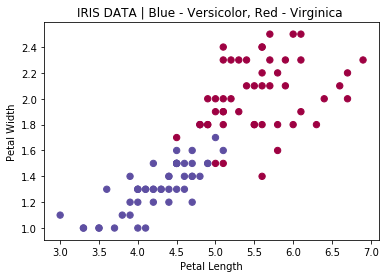

In [15]:
#Make a scatter plot
plot.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plot.cm.Spectral);
plot.title("IRIS DATA | Blue - Versicolor, Red - Virginica ")
plot.xlabel('Petal Length')
plot.ylabel('Petal Width')
plot.show()

In [16]:
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2) # we set up a seed so that our output matches ours although the initialization is random.
    
    W1 = np.random.randn(n_h, n_x) * 0.01 #weight matrix of shape (n_h, n_x)
    b1 = np.zeros(shape=(n_h, 1))  #bias vector of shape (n_h, 1)
    W2 = np.random.randn(n_y, n_h) * 0.01   #weight matrix of shape (n_y, n_h)
    b2 = np.zeros(shape=(n_y, 1))  #bias vector of shape (n_y, 1)
       
    #store parameters into a dictionary    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
#Function to define the size of the layer
def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_h = 6# size of hidden layer
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [17]:
def forward_propagation(X, parameters):
#retrieve intialized parameters from dictionary    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    # Implement Forward Propagation to calculate A2 (probability)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)  #tanh activation function
    Z2 = np.dot(W2, A1) + b2
    A2 = 1/(1+np.exp(-Z2))  #sigmoid activation function
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


In [18]:
def compute_cost(A2, Y, parameters):
   
    m = Y.shape[1] # number of training examples
    
    # Retrieve W1 and W2 from parameters
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    return cost

In [21]:
def backward_propagation(parameters, cache, X, Y):
# Number of training examples
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
    ### END CODE HERE ###
        
    # Retrieve A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads


In [22]:
def update_parameters(parameters, grads, learning_rate=1.2):
# Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [23]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    return parameters,n_h

In [24]:
parameters = nn_model(X,Y , n_h = 6, num_iterations=10000, print_cost=True)

Cost after iteration 0: 0.693225
Cost after iteration 1000: 0.648500
Cost after iteration 2000: 0.134067
Cost after iteration 3000: 0.126904
Cost after iteration 4000: 0.121865
Cost after iteration 5000: 0.123496
Cost after iteration 6000: 0.121045
Cost after iteration 7000: 0.113961
Cost after iteration 8000: 0.103626
Cost after iteration 9000: 0.088409


In [27]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 0.25, X[0, :].max() + 0.25
    y_min, y_max = X[1, :].min() - 0.25, X[1, :].max() + 0.25
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0,:])
    plt.title("Decision Boundary for hidden layer size " + str(6))
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    Plt.show()
    return plt